# Univariate Statistical Visualizations With Seaborn
## Objectives
* Use seaborn library for plotting statistical visualizations along with pandas and matplotlib.
* Create and customize histograms with seaborn `.lmplot()` function. 
* Create single variable and multi-variable Boxplots for inspecting spread of data. 
* Create Swarm plots to identify spread and overlap of data elements in a dataset. 
* Create Violin plots to visualize the spread and density function of variables in a single plot. 

## Introduction

In this lesson and the accompanying lab, we shall look at Python's Seaborn library in a statistical data visualization context. Seaborn is a high level interface to Matplotlib and offers simple ways to create attractive plots. [Seaborn's official site](https://seaborn.pydata.org/) describes seaborn as:

***"If matplotlib “tries to make easy things easy and hard things possible”, seaborn tries to make a well-defined set of hard things easy too."***

So if you know matplotlib, you know most of seaborn to start with. Seaborn resolves two of the major shortcomings of Matplotlib i.e. default parameters and working with data frames. Other benefits of using seaborn can be summarized as below:

* Visualizing data from NumPy matrices as well as Pandas data frames. 
* Display data distribution without in depth tweaking. 
* Comes packaged with attractive themes and style palettes and allows further custmoization of these. 

Below is an example of default palettes and styles available in seaborn for statistical visualizations. We shall learn how to plot some of these statistical visualizations in this lesson. 

![](seaborn_examples.png)


## Installing and Importing `seaborn`

Seaborn can be installed in your python environment with a simple pip install as:

In [12]:
# Uncomment below to install seaborn
#!pip install seaborn

In order to get the maximum functionality out of Seaborn, you must also install Pandas, Matplotlib and Numpy. Let's import all these along with Seaborn library to start plotting. Seaborn is generally imported as `sns` so let's stick to the convention.  

In [54]:
# Import necessary libraries for plotting 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Visualizing data with `seaborn`

Now we shall load the popular **iris** dataset which comes packaged with Seaborn for experimentation. The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features are measured from each sample: the length and the width of the sepals and petals, in centimeters. It's a great dataset for beginners learning to work with data analysis and visualization. Visit [UCI machine learning site](https://archive.ics.uci.edu/ml/datasets/iris) for details on the features of this dataset. 

To view all the available data sets in the Seaborn library, you can use the following command with the `get_dataset_names()` function as shown below:

In [81]:
print(sns.get_dataset_names())

['anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'iris', 'mpg', 'planets', 'tips', 'titanic']


The `.load_dataset()` method in seaborn allows to load any of the datasets available easily as shown below:

In [82]:
# Load iris dataset
iris = sns.load_dataset('iris')

# View the head
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Visualizing Uni-variate Data in Seaborn


Statistical visualization is used to understand how certain data values is distributed along the range, and how that compares to data elements and their distributions. 

Histogram, Boxplots, swarm plots and violinplots effectively estimate and visualize the statistical distribution of Univariate data as we shall see in this lesson. Univariate analysis is the simplest form of data analysis. “Uni” means “one”, so in other words your data has only one variable, or you choose to extract values for a single variable from a bigger dataset to inspect it in detail. It doesn't deal with causes or relationships  and it's major purpose is to describe a data variable. Univariate analysis generally inputs data, summarizes finds patterns in the data. We shall see this in action for the iris dataset below.


### Histograms

Histograms are used to visualize the distribution of values for a variable by creating *bins* around the range of data and drawing bars to show the number of observations that fall in each bin. At a first glance, a histogram may appear very similar to a bar chart in appearance. However, we can use following rule of thumb to distinguish between the two. A histogram's bars are adjacent to each other whereas in a bar chart, there is usually some space between bars as shown below: 

![](bars1.svg)

Seaborn comes with a function `.distplot()` that can be used to draw a histogram. With our iris dataset above, let's visualize the distribution of values for `sepal_length` feature.

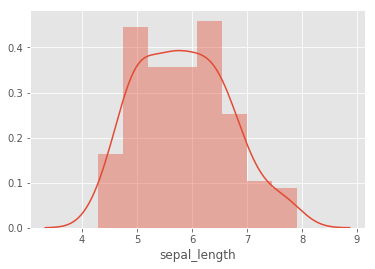

In [83]:
# Draw a histogram for sepal length
sns.distplot(iris.sepal_length)

By defafult, the `distplot()` function show *KDE* (Kernal Density Estimate) which is used to measure probability density function of random variables. The line in above graph is the KDE for our chosen feature. For a standard histogram,  we can disable this by setting `kde=False` as an extra argument. We can also change the number of bins within a histogram by passing `bins=b` argument to the function, where `b` is the number of bins to be used. Let's try these arguments below:

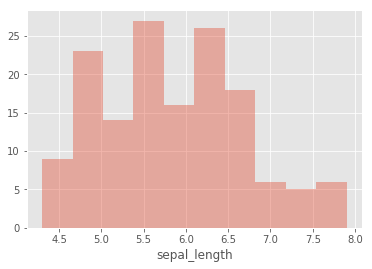

In [58]:
sns.distplot(iris.sepal_length, kde=False, bins = 10)

We can also pass `hist=False` argument, to view the probability density function for the chosen feature ONLY. Try this in the above plot and inspect the output. 

To compare the values distribution of more than one variables, seaborn also allows us to combine multiple histograms for comparison of values distributions. Let's plot histograms for `sepal_length` and `petal_length` and comment on the output.

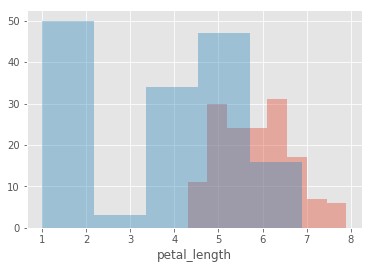

In [87]:
sns.distplot(iris['sepal_length'], kde=False)
sns.distplot(iris['petal_length'], kde=False);

The area of overlap is a first good indicator on how similar (or different), the distributions of continuous variable values are. So the above output tells us that these two variables are SOMEWHAT similar - not much overlap here. How about comparing `sepal_length` with `petal_width` above, and all other combinations? 

Remember, comparing two variables would a bivariate analysis (bi=2). We shall see more of this in our next lesson. For now, let's move to another univariate visualization technique - Boxplot.  

### Box Plots

Boxplots are a convenient tool to visualize the distribution of data through their **Quartiles**.

>Quartiles are the values that divide a list of numbers into quarters. The first quartile (Q1) is defined as the middle number between the smallest number and the median of the data set. The second quartile (Q2) is the median of the data. The third quartile (Q3) is the middle value between the median and the highest value of the data set. Follow [this link](http://www.statisticshowto.com/what-are-quartiles/) to learn more about quartiles. 

<img src="box1.png" alt="drawing" width="400"/>



Box plots have lines (whiskers) extending from the boxes, indicating variability of data outside the upper and lower quartiles, hence they are also called *box-and-whisker plots*. Box plots are **non-parametric**, i.e. they display variation in samples of a statistical population without making any assumptions of the underlying statistical distribution. In seaborn, `.boxplot()` function is used to create a boxplot of given variable as shown below:

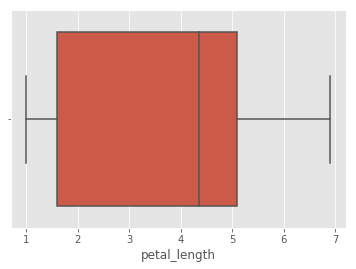

In [84]:
# Create a boxplot for petal_length
sns.boxplot(iris.petal_length)

Box plots are good statistical indicators of variety/variability of data in a continuous variable. In some cases, it maybe required to calculate and compare boxplots for all continuous variables in a given dataset. For this, we can simply pass in the whole dataset to the boxplot function to calculate and do a side by side statistical comparison of all variables in the dataset. Let's try this while setting a larger figure size using Matplotlib. 


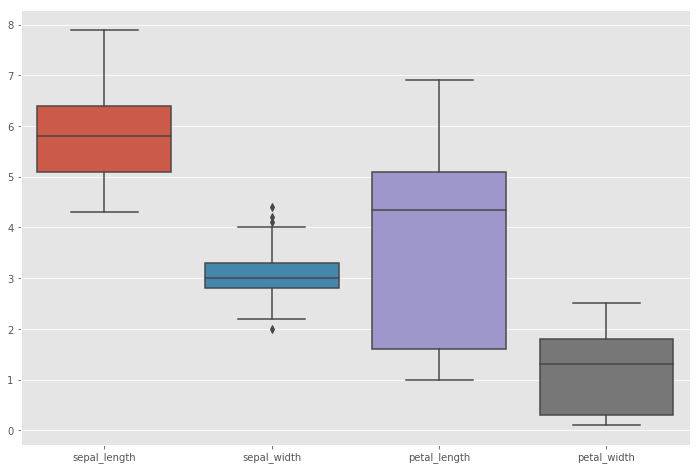

In [85]:
# Create and compare boxplots for features in iris dataset
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.boxplot(data=iris)

As we see above, for each continuous variable we can directly identify the range of values against the y-axis and compare all variables to each other. Boxplots also help you identify **outliers** (black dots in the case of sepal_width). A **minor outlier** is a point that falls outside the data set's fences , while one that falls outside the outer fences is classified as a **major outlier**. An analyst must keep an eye on outliers as they could prove to be problematic towards data analysis. 


### Swarmplots

Seaborn allows you to use a `swarmplot()` function to view the distribution of values for each class (3 classes in our example). Let's create a swarmplot for petal_length and see how different classes behave under this variable, as shown below:

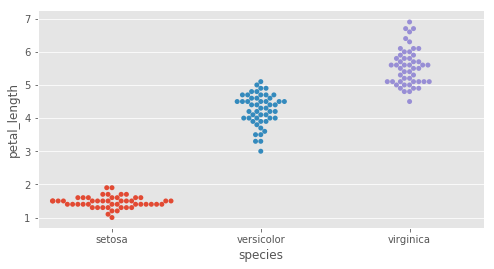

In [72]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)
sns.swarmplot(x = "species", y = "petal_length", data = iris)
plt.show()

Swarmplots provide a handy visualization techniques to view the spread of values for different classes in a continuous variable. Above plot tells us species versicolor and virginicia are somewhat similar in terms of their petal length as there is some area of overlap. The setosa, however, has much smaller range of values, and is quite different from the other two. 

### Violin Plots

A Violin Plot helps visualise the distribution of the data and its probability density.

This chart is a combination of a Box Plot and a Density Plot that is rotated and placed on each side, to show the distribution of the values in the data. The thick black bar in the centre represents the interquartile range, the thin black line extended from it represents the 95% confidence intervals, and the white dot is the median (middle value).
![](violin1.svg)

Seaborn allows creating violinplots with the `.violinplot()` function. Let's create a violin plot to show an output similar to the swamplot above i.e. distribution of values in `petal_length` with respect to classes in `species` as shown below:

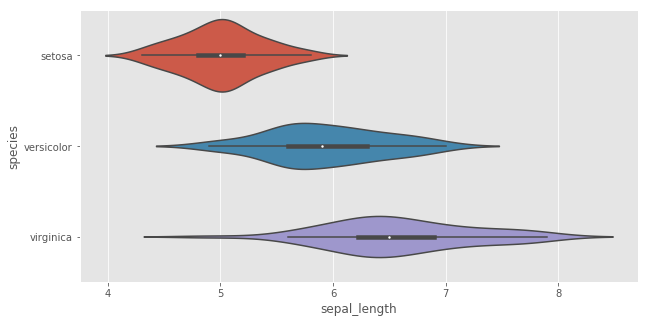

In [80]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.violinplot(x = "sepal_length", y = "species", data=iris)
plt.show()

Here the KDE is drawn alongside the boxplot, thus providing a much deeper statistical insight. Try above with other variables and inspect the output.

## Summary

In this lesson, we learnt how to install and import seaborn into the python environment. We looked at some of the univariate visualization tools available in seaborn including histograms, box plots, swarm plots and violin plots. All these techniques can be used to visually inspect the spread of values found within a data variable. With some techniques, we can also include more than one variable for comparison. We shall look at this in more detail in the next lesson. 